# Intro to ML - Assignment 1
##### Jaffar Totanji - j.totanji@innopolis.university

## 1.Practical Task

### 1.1 Preprocessing


In [594]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

%matplotlib inline

# reading and viewing the data
dataset = pd.read_csv('./a1_dataset.csv')

dataset.head()

,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,Micronesia,138.0,393.00,no,2019-07-20 13:21:37
1,0,446.06,666.182,Dominica,81.0,352.05,yes,2019-04-04 21:30:46
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,2019-03-03 02:59:37
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,2019-03-19 08:00:58
4,0,453.08,600.156,Cameroon,105.0,422.95,no,2019-03-18 13:22:35


In [595]:
# dropping var7
dataset.drop('var7', axis=1, inplace=True)

dataset.head()

,target,var1,var2,var3,var4,var5,var6
0,0,509.18,417.681,Micronesia,138.0,393.00,no
1,0,446.06,666.182,Dominica,81.0,352.05,yes
2,1,235.50,398.097,Isle of Man,90.0,339.00,no
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes
4,0,453.08,600.156,Cameroon,105.0,422.95,no


#### Encoding Categorical Values:

I chose to trade accuracy for efficiency here, as I will be using `Ordinal Encoding` for `var3`. It is true that `Ordinal Encoding` is used for categorical values which have a natural ranking order unlike `var3`, but using `One-Hot Encoding` for the names above would result in too many extra columns which is neither efficient nor proportional to the size of the dataset. For `var6` I will be using `One-Hot Encoding`, as there is no natural ranking order between the values it can take, and also because the column can only take one of two values, so `One-Hot Encoding` would only result in one extra column which is quite good in terms of efficiency.

In [596]:
from sklearn.preprocessing import OrdinalEncoder

# Encoding var3
encoder = OrdinalEncoder()

encoded_var3 = encoder.fit_transform(dataset[['var3']])

dataset['var3'] = encoded_var3

dataset.head()

,target,var1,var2,var3,var4,var5,var6
0,0,509.18,417.681,137.0,138.0,393.00,no
1,0,446.06,666.182,57.0,81.0,352.05,yes
2,1,235.50,398.097,101.0,90.0,339.00,no
3,0,306.02,518.163,216.0,102.0,439.25,yes
4,0,453.08,600.156,36.0,105.0,422.95,no


In [597]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

# Encoding var6
encoded_var6 = pd.DataFrame(encoder.fit_transform(dataset[['var6']]))

# Adding the encoded columns of var6 back to the original dataset
dataset = dataset.join(encoded_var6)

# Dropping the old var6 column
dataset.drop('var6', axis=1, inplace=True)

# Giving the encoded columns meaningful
dataset.rename(columns={0 : 'no', 1 : 'yes'}, inplace=True)

dataset.head()

,target,var1,var2,var3,var4,var5,no,yes
0,0,509.18,417.681,137.0,138.0,393.00,1.0,0.0
1,0,446.06,666.182,57.0,81.0,352.05,0.0,1.0
2,1,235.50,398.097,101.0,90.0,339.00,1.0,0.0
3,0,306.02,518.163,216.0,102.0,439.25,0.0,1.0
4,0,453.08,600.156,36.0,105.0,422.95,1.0,0.0


#### Data Imputation:

As `var4` is missing many values, we will apply Regression techniques to predict these missing values. Let's first try `Linear Regression`, specifically `Multiple Linear Regression` since we have more than one feature affecting the output. 

In [598]:
# Analyzing the format of the missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  925 non-null    int64  
 1   var1    925 non-null    float64
 2   var2    925 non-null    float64
 3   var3    925 non-null    float64
 4   var4    325 non-null    float64
 5   var5    925 non-null    float64
 6   no      925 non-null    float64
 7   yes     925 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 57.9 KB


In [599]:
# Getting our features
X = dataset.drop(dataset.columns[4], axis=1)
X.head()

,target,var1,var2,var3,var5,no,yes
0,0,509.18,417.681,137.0,393.00,1.0,0.0
1,0,446.06,666.182,57.0,352.05,0.0,1.0
2,1,235.50,398.097,101.0,339.00,1.0,0.0
3,0,306.02,518.163,216.0,439.25,0.0,1.0
4,0,453.08,600.156,36.0,422.95,1.0,0.0


In [600]:
Y = dataset.iloc[:, [4]]

cols = X.columns

# Combining the data again to remove rows where var4 is null as they wont be used in the training nor testing phases
combined = X.join(Y)

combined_without_null = combined[combined.var4.notnull()]

X = pd.DataFrame(combined_without_null,
                        columns=cols)
X.info()

Y = combined_without_null.iloc[:, [7]]
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 324
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  325 non-null    int64  
 1   var1    325 non-null    float64
 2   var2    325 non-null    float64
 3   var3    325 non-null    float64
 4   var5    325 non-null    float64
 5   no      325 non-null    float64
 6   yes     325 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 20.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 324
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var4    325 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


Next, let's split `X` and `Y` into training and data sets:

In [601]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

X_train.shape

(260, 7)

Now let's start the training process:

In [602]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [603]:
# Intercept and coefficients
intercept = model.intercept_
print(intercept)
coefficients = model.coef_
print(coefficients)

[50.56873604]
[[ 4.00948793e+01  4.29607301e-02  1.42108337e-03  3.11710851e-02
   5.63135323e-02  7.52911983e-01 -7.52911983e-01]]


Predicting the test dataset:

In [604]:
Y_pred = model.predict(X_test)

Creating a dataframe to compare the predicted and actual labels:

In [605]:
Y_pred = np.squeeze(Y_pred)

Y_test = np.squeeze(Y_test)

df_ = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

df_.head()

,Actual,Predicted
256,132.0,93.233321
65,87.0,96.132037
15,93.0,94.802366
66,66.0,89.077785
269,78.0,93.309611


Now let's calculate the errors to compare with `Polynomial Regression` later:

In [606]:
from sklearn import metrics

scores = cross_val_score(model, X, Y,
                             scoring="neg_mean_squared_error", cv=3)

linear_reg_cross_MSE = -scores.mean()

print('Cross-Validated MSE:', linear_reg_cross_MSE)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Cross-Validated MSE: 530.59833782843
Mean Absolute Error: 16.85237786013566
Mean Squared Error: 466.22346114899904
Root Mean Squared Error: 21.592208343497408


Now let's try to predict the missing values again using `Polynomial Regression`. We will try out degrees within range [2, 4]
:

In [607]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

degrees = [2, 3, 4]

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, Y_train)

    scores = cross_val_score(pipeline, X, Y,
                             scoring="neg_mean_squared_error", cv=3)

    Y_pred_poly = pipeline.predict(X_test)
    
    print(f'Mean Squared Error at Degree {degree}:', metrics.mean_squared_error(Y_test, Y_pred_poly))

    print(f'Mean Squared Error using Cross-Validation at Degree {degree}:', -scores.mean() )

print('Mean Squared Error Linear Regression:', metrics.mean_squared_error(Y_test, Y_pred))

print('Cross-Validated MSE Linear Regression:',linear_reg_cross_MSE)

Mean Squared Error at Degree 2: 349.03061706187066
Mean Squared Error using Cross-Validation at Degree 2: 1108.0101891640277
Mean Squared Error at Degree 3: 615.6856515461724
Mean Squared Error using Cross-Validation at Degree 3: 1220.6260263707413
Mean Squared Error at Degree 4: 73433.34379009964
Mean Squared Error using Cross-Validation at Degree 4: 22843.975339030276
Mean Squared Error Linear Regression: 466.22346114899904
Cross-Validated MSE Linear Regression: 530.59833782843


We can see that `Linear Regression` did the best job at predicting the missing values since the Cross-Validation score for Polynomial Regression (which is a more accurate one MSE) resulted in higher values than that of `Linear Regression`. So let's use `Linear Regression` to fill the gaps in our dataset.

In [608]:
# `combined` contains the entire dataset with var4 as the last column
combined.head()

,target,var1,var2,var3,var5,no,yes,var4
0,0,509.18,417.681,137.0,393.00,1.0,0.0,138.0
1,0,446.06,666.182,57.0,352.05,0.0,1.0,81.0
2,1,235.50,398.097,101.0,339.00,1.0,0.0,90.0
3,0,306.02,518.163,216.0,439.25,0.0,1.0,102.0
4,0,453.08,600.156,36.0,422.95,1.0,0.0,105.0


In [609]:
# The entire dataset except for var4
X = pd.DataFrame(combined,
                 columns=cols)
combined['var4_prediction'] = model.predict(X)
combined.head()

,target,var1,var2,var3,var5,no,yes,var4,var4_prediction
0,0,509.18,417.681,137.0,393.00,1.0,0.0,138.0,100.191609
1,0,446.06,666.182,57.0,352.05,0.0,1.0,81.0,91.527518
2,1,235.50,398.097,101.0,339.00,1.0,0.0,90.0,124.338075
3,0,306.02,518.163,216.0,439.25,0.0,1.0,102.0,95.167693
4,0,453.08,600.156,36.0,422.95,1.0,0.0,105.0,96.579135


Now let's replace the null values of `var4` with our predictions from `var4_predictions`:

In [610]:
combined.info()

# Filling null values of var4 with values of var4_prediction
combined = combined.bfill(axis=1)

preprocessed_dataset = combined.drop(combined.columns[8], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           925 non-null    int64  
 1   var1             925 non-null    float64
 2   var2             925 non-null    float64
 3   var3             925 non-null    float64
 4   var5             925 non-null    float64
 5   no               925 non-null    float64
 6   yes              925 non-null    float64
 7   var4             325 non-null    float64
 8   var4_prediction  925 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 65.2 KB


Now we end up with the preprocessed dataset where we encoded categorical values and predicted the missing ones:

In [611]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  925 non-null    float64
 1   var1    925 non-null    float64
 2   var2    925 non-null    float64
 3   var3    925 non-null    float64
 4   var5    925 non-null    float64
 5   no      925 non-null    float64
 6   yes     925 non-null    float64
 7   var4    925 non-null    float64
dtypes: float64(8)
memory usage: 57.9 KB


In [612]:
preprocessed_dataset.head()

,target,var1,var2,var3,var5,no,yes,var4
0,0.0,509.18,417.681,137.0,393.00,1.0,0.0,138.0
1,0.0,446.06,666.182,57.0,352.05,0.0,1.0,81.0
2,1.0,235.50,398.097,101.0,339.00,1.0,0.0,90.0
3,0.0,306.02,518.163,216.0,439.25,0.0,1.0,102.0
4,0.0,453.08,600.156,36.0,422.95,1.0,0.0,105.0


#### Implementing the PCA technique
PCA intends to reduce the dimesnsionality of the dataset by finding a fewer number of features which best represent our databest. It does that by finding the best linear combinations of the original features of the dataset so that the variance along the new features is maximum.

In [613]:
# Selecting the features
X = preprocessed_dataset.drop(preprocessed_dataset.columns[0], axis=1)
X.head()

,var1,var2,var3,var5,no,yes,var4
0,509.18,417.681,137.0,393.00,1.0,0.0,138.0
1,446.06,666.182,57.0,352.05,0.0,1.0,81.0
2,235.50,398.097,101.0,339.00,1.0,0.0,90.0
3,306.02,518.163,216.0,439.25,0.0,1.0,102.0
4,453.08,600.156,36.0,422.95,1.0,0.0,105.0


In [614]:
# Selecting the target
Y = preprocessed_dataset.iloc[:, [0]]
Y.head()

,target
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


Next, we will reduce the mean of our features to 0 since PCA directions are highly sensitive to data scaling.

In [615]:
X_scaled = X - X.mean()

X_scaled.head()

,var1,var2,var3,var5,no,yes,var4
0,149.063438,-130.709134,22.356757,67.606054,0.522162,-0.522162,29.395849
1,85.943438,117.791866,-57.643243,26.656054,-0.477838,0.477838,-27.604151
2,-124.616562,-150.293134,-13.643243,13.606054,0.522162,-0.522162,-18.604151
3,-54.096562,-30.227134,101.356757,113.856054,-0.477838,0.477838,-6.604151
4,92.963438,51.765866,-78.643243,97.556054,0.522162,-0.522162,-3.604151


Let's now find the principal components which are the eigenvectors of the covariance matrix.

In [616]:
covariance_matrix = np.cov(X_scaled.T)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print(eigenvalues)

[ 2.11660509e+04  7.95034226e+03  4.80195274e+03  3.28900785e+03
  2.49662640e+02  4.97744856e-01 -3.58282210e-16]


Now, since we want to reduce the dimensionality of our dataset by constructing a new feature subspace, we limit the choice of our vectors to the ones that contain most of the variance, which tells us how well this vector represents the variety in our dataset. To find the ones that contain the highest variance we simply compare their corresponding eigenvalues, which represent the magnitude of the eigenvectors.

In [617]:
# Creating (eigenvalue, eigenvector) tuples to maintain their association while sorting
PCs = [(eigenvalue, eigenvector) for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors)]

In [618]:
def first(some_tuple):
  return some_tuple[0]

PCs.sort(key=first, reverse=True)

# Calculating the variance representation of each vector
eigenvlaues_sum = sum(eigenvalues)

def calc_variance_percentage(value):
  return value / eigenvlaues_sum * 100

variance_representations = [calc_variance_percentage(i) for i in sorted(eigenvalues)][::-1]
print(variance_representations)

[56.506822171250136, 21.22495963405922, 12.819731506814055, 8.780635682840682, 0.6665221799196672, 0.0013288251162323597, -9.565029028492024e-19]


Now, let's choose both the top 2 and 3 vectors to visualize the data in 2 and 3 dimensional spaces taking into account ~78.2% and ~90.9% of the variance respectively:

In [619]:
projection_matrix_2d = np.hstack((PCs[0][1][:, np.newaxis], PCs[1][1][:, np.newaxis]))
projection_matrix_3d = np.hstack((PCs[0][1][:, np.newaxis], PCs[1][1][:, np.newaxis], PCs[2][1][:, np.newaxis]))

We can now project our training dataset onto the new feature space using the dot product:

In [620]:
X_pca_2d = X_scaled.dot(projection_matrix_2d)
X_pca_3d = X_scaled.dot(projection_matrix_3d)

Let's visualize our dataset in a 2 dimensional space:

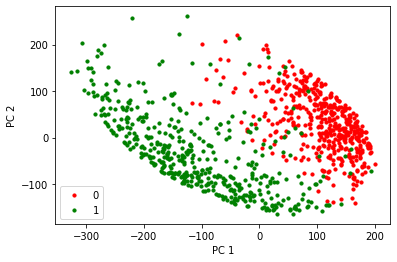

In [621]:
zero_val_rows = Y['target'] == 0
one_val_rows = Y['target'] == 1

plt.scatter(X_pca_2d[zero_val_rows][0],
            X_pca_2d[zero_val_rows][1],
            c='r',
            label='0',
            s=10)

plt.scatter(X_pca_2d[one_val_rows][0],
            X_pca_2d[one_val_rows][1],
            c='g',
            label='1',
            s=10)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Let's now visualize the dataset in a 3 dimensional space:

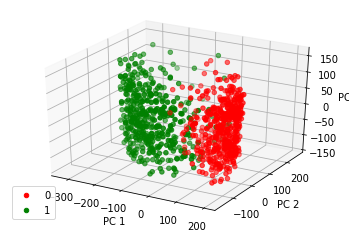

In [622]:
zero_val_rows = Y['target'] == 0
one_val_rows = Y['target'] == 1

fig = plt.figure(2)
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_3d[zero_val_rows][0],
            X_pca_3d[zero_val_rows][1],
            X_pca_3d[zero_val_rows][2],
            c='r',
            label='0')

ax.scatter(X_pca_3d[one_val_rows][0],
            X_pca_3d[one_val_rows][1],
            X_pca_3d[one_val_rows][2],
            c='g',
            label='1')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.legend(loc='lower left')
plt.show()

### 1.2 Training:

We already have our features and target seperated into X and Y from the previous step.

In [623]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    925 non-null    float64
 1   var2    925 non-null    float64
 2   var3    925 non-null    float64
 3   var5    925 non-null    float64
 4   no      925 non-null    float64
 5   yes     925 non-null    float64
 6   var4    925 non-null    float64
dtypes: float64(7)
memory usage: 50.7 KB


In [624]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  925 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


We have all our data encoded already, let's apply `Standardization` in preparation for applying the models.

In [625]:
from sklearn.preprocessing import StandardScaler

X_scaled = X
scaler = StandardScaler()
for column in X_scaled.columns:
    X_scaled[[column]] = pd.DataFrame(scaler.fit_transform(np.array(X_scaled[column]).reshape(-1, 1)))

X.head()

,var1,var2,var3,var5,no,yes,var4
0,1.697391,-0.967153,0.321166,0.857726,1.045352,-1.045352,1.506178
1,0.978641,0.871575,-0.828074,0.338188,-0.956616,0.956616,-1.414375
2,-1.419013,-1.112060,-0.195992,0.172622,1.045352,-1.045352,-0.953235
3,-0.616000,-0.223659,1.456041,1.444505,-0.956616,0.956616,-0.338382
4,1.058578,0.383030,-1.129750,1.237705,1.045352,-1.045352,-0.184669


We are now ready to apply `Logistic Regression` while utilizing `K-Fold Cross-Validation`:

In [626]:
# Creating a dictionary to keep the data for later comparison
chart_data = {}

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

def apply_logistic_regression(features, target):
  kf = KFold(n_splits=3)

  accuracies = 0
  precisions = 0
  recalls = 0
  
  for train, test in kf.split(X_scaled):
    
    X_train, X_test = X_scaled.iloc[train], X_scaled.iloc[test]
    Y_train, Y_test = Y.iloc[train], Y.iloc[test]

    lr_clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

    print("Coefficients:")
    print(X_train.columns)
    print(lr_clf.coef_)

    Y_test_pred = lr_clf.predict(X_test)

    accuracies += metrics.accuracy_score(Y_test, Y_test_pred)
    
    precisions += metrics.precision_score(Y_test, Y_test_pred)

    recalls += metrics.recall_score(Y_test, Y_test_pred)


  nl = '\n'
  print(f"Logistic Regression with K-Fold Cross-Validation achieved:{nl}An Accuracy of {accuracies/3}{nl}A precision of {precisions/3}{nl}A Recall of {recalls/3}")

  return accuracies/3

chart_data['logistic_regression_accuracy'] = apply_logistic_regression(X_scaled, Y)

Coefficients:
Index(['var1', 'var2', 'var3', 'var5', 'no', 'yes', 'var4'], dtype='object')
[[-1.61294466 -0.83361926 -0.24679768 -1.9028821  -0.11390881  0.11390881
   3.52353262]]
Coefficients:
Index(['var1', 'var2', 'var3', 'var5', 'no', 'yes', 'var4'], dtype='object')
[[-2.09238195 -1.2152387  -0.21299881 -3.03301453 -0.21523526  0.21523526
   1.62606297]]
Coefficients:
Index(['var1', 'var2', 'var3', 'var5', 'no', 'yes', 'var4'], dtype='object')
[[-2.38677791 -1.17260948 -0.24490924 -2.58870188 -0.07989988  0.07989988
   1.59733239]]
Logistic Regression with K-Fold Cross-Validation achieved:
An Accuracy of 0.9546575323274352
A precision of 0.9685138158292522
A Recall of 0.9407885906040269


In order to apply KNN + GirdSearch, we need to split our data into training and testing datasets:

In [627]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

Let's now apply KNN in combination with GridSearch Cross-Validation for fine-tuning the hyper-parameters:

In [628]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def apply_KNN(features_train, features_test, target_train, target_test):

  param_grid = {'n_neighbors':list(range(1, 11)),
                'weights':['uniform', 'distance'],
                'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
                }

  grid_search_clf = GridSearchCV(estimator=KNeighborsClassifier(),
                                cv=3, scoring='accuracy',
                                param_grid=param_grid
                                )

  grid_search_clf.fit(features_train, target_train)

  means = grid_search_clf.cv_results_['mean_test_score']
  stds = grid_search_clf.cv_results_['std_test_score']

  print("Best parameter set found on training dataset:")
  print(grid_search_clf.best_params_)

  Y_pred = grid_search_clf.predict(features_test)
  print(f"With a test accuracy of: {metrics.accuracy_score(target_test, Y_pred)}")

  return metrics.accuracy_score(target_test, Y_pred)

chart_data['KNN_accuracy'] = apply_KNN(X_train, X_test, Y_train, Y_test)

Best parameter set found on training dataset:
{'metric': 'chebyshev', 'n_neighbors': 6, 'weights': 'distance'}
With a test accuracy of: 0.9945945945945946


Let's now apply Naive Bayes alongside K-Fold Cross-Validation:

In [629]:
from sklearn.naive_bayes import GaussianNB

def apply_naive_bayes(features, target):
  kf = KFold(n_splits=3)

  gauss_nb_clf = GaussianNB()

  scores = cross_val_score(gauss_nb_clf, features, target, cv=kf)

  print(f"Naive Bayes with K-Fold Cross-Validation achieved a {scores.mean()} accuracy with a standard deviation of {scores.std()}")

  return scores.mean()

chart_data['naive_bayes_accuracy'] = apply_naive_bayes(X_scaled, Y)

Naive Bayes with K-Fold Cross-Validation achieved a 0.9255243138738285 accuracy with a standard deviation of 0.07777491053524968


Let's now apply the same models to our dataset with reduced dimensions via PCA:

In [630]:
print("Across 2 dimensions:")

# Logistic Regression
chart_data['logistic_regression_accuracy_2d'] = apply_logistic_regression(X_pca_2d, Y)

#KNN
print("KNN:")
# Splitting our dataset into training and testing data
X_tr, X_te, Y_tr, Y_te = train_test_split(X_pca_2d, Y, test_size=0.2, random_state=0)
chart_data['KNN_accuracy_2d'] = apply_KNN(X_tr, X_te, Y_tr, Y_te)

# Naive Bayes
chart_data['naive_bayes_accuracy_2d'] = apply_naive_bayes(X_pca_2d, Y)

print("Across 3 dimensions:")
# Logistic Regression
chart_data['logistic_regression_accuracy_3d'] = apply_logistic_regression(X_pca_3d, Y)

# KNN
print("KNN:")
# Splitting our dataset into training and testing data
X_tr, X_te, Y_tr, Y_te = train_test_split(X_pca_3d, Y, test_size=0.2, random_state=0)
chart_data['KNN_accuracy_3d'] = apply_KNN(X_tr, X_te, Y_tr, Y_te)

# Naive Bayes
chart_data['naive_bayes_accuracy_3d'] = apply_naive_bayes(X_pca_3d, Y)

Across 2 dimensions:
Coefficients:
Index(['var1', 'var2', 'var3', 'var5', 'no', 'yes', 'var4'], dtype='object')
[[-1.61294466 -0.83361926 -0.24679768 -1.9028821  -0.11390881  0.11390881
   3.52353262]]
Coefficients:
Index(['var1', 'var2', 'var3', 'var5', 'no', 'yes', 'var4'], dtype='object')
[[-2.09238195 -1.2152387  -0.21299881 -3.03301453 -0.21523526  0.21523526
   1.62606297]]
Coefficients:
Index(['var1', 'var2', 'var3', 'var5', 'no', 'yes', 'var4'], dtype='object')
[[-2.38677791 -1.17260948 -0.24490924 -2.58870188 -0.07989988  0.07989988
   1.59733239]]
Logistic Regression with K-Fold Cross-Validation achieved:
An Accuracy of 0.9546575323274352
A precision of 0.9685138158292522
A Recall of 0.9407885906040269
KNN:
Best parameter set found on training dataset:
{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
With a test accuracy of: 0.9243243243243243
Naive Bayes with K-Fold Cross-Validation achieved a 0.9383747320640525 accuracy with a standard deviation of 0.00704347

Visualizing the results:

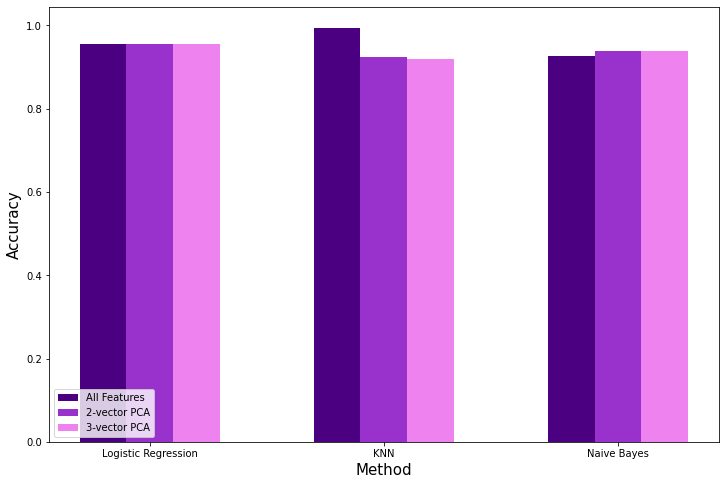

In [631]:
fig = plt.figure(3, figsize =(12, 8))
ax = fig.add_subplot()
 
bar_w = 0.20

all_features = [chart_data['logistic_regression_accuracy'], chart_data['KNN_accuracy'], chart_data['naive_bayes_accuracy']]
PCA_2d = [chart_data['logistic_regression_accuracy_2d'], chart_data['KNN_accuracy_2d'], chart_data['naive_bayes_accuracy_2d']]
PCA_3d = [chart_data['logistic_regression_accuracy_3d'], chart_data['KNN_accuracy_3d'], chart_data['naive_bayes_accuracy_3d']]
 
br1 = np.arange(3)
br2 = [x + bar_w for x in br1]
br3 = [x + bar_w for x in br2]
 
ax.bar(br1, all_features, color ='indigo', 
        width = bar_w, label ='All Features')
ax.bar(br2, PCA_2d, color ='darkorchid', width = bar_w,
        label ='2-vector PCA')
ax.bar(br3, PCA_3d, color ='violet', width = bar_w,
        label ='3-vector PCA')
 
ax.set_xlabel('Method', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)

ax.set_xticks([r + bar_w for r in range(3)])
ax.set_xticklabels(['Logistic Regression', 'KNN', 'Naive Bayes'])

ax.legend(loc='lower left')
plt.show()


Looking at the chart, we can see that KNN + GridSearch Cross-Validation achieved the best accuracy using our original features without dimensionality reduction. The accuracy achieved by the method was ~99.4%, making it a good candidate for our problem.

### References:
Lecture slides/recordings and Labs from our course:
- https://moodle.innopolis.university/course/view.php?id=1127

External:
- https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad
- https://medium.com/analytics-vidhya/dimensionality-reduction-principal-component-analysis-d1402b58feb1
- https://www.kdnuggets.com/2020/05/dimensionality-reduction-principal-component-analysis.html
- https://scikit-learn.org/stable/index.html
- https://matplotlib.org/stable/index.html
- https://pandas.pydata.org/docs/index.html
- https://numpy.org/doc/
